## EDA: Exploratory Data Analysis

In [1]:
# import libraries
import sweetviz as sv
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\proud\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Dataset
crop_df = pd.read_csv('./Crop_recommendation.csv')

In [3]:
# Check the shape of the dataset
print(crop_df.shape)

(813, 8)


In [4]:
# View Dataset
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Check the data type of each column
crop_df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
# Checking for missing values
print(crop_df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
# Key Statistics
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,42.525215,77.638376,77.290283,22.588083,56.966143,6.308703,111.584416
std,28.358818,33.829726,73.142225,5.047262,28.786141,0.836535,59.421869
min,0.000000,35.000000,15.000000,8.825675,14.258040,4.548202,5.314507
25%,22.000000,55.000000,21.000000,19.331626,22.331959,5.732454,73.092670
50%,35.000000,66.000000,39.000000,22.055923,65.345839,6.112306,96.658889
75%,67.000000,80.000000,85.000000,24.714175,82.456872,6.655918,125.097269
max,100.000000,145.000000,205.000000,41.948657,94.920481,8.967058,298.560117


In [8]:
# Data Visualization using Sweetviz
crop_report = sv.analyze(crop_df)

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:01 -> (00:00 left)


In [9]:
# Creating HTML file
crop_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
pd.unique(crop_df['label'])

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'grapes', 'apple'],
      dtype=object)

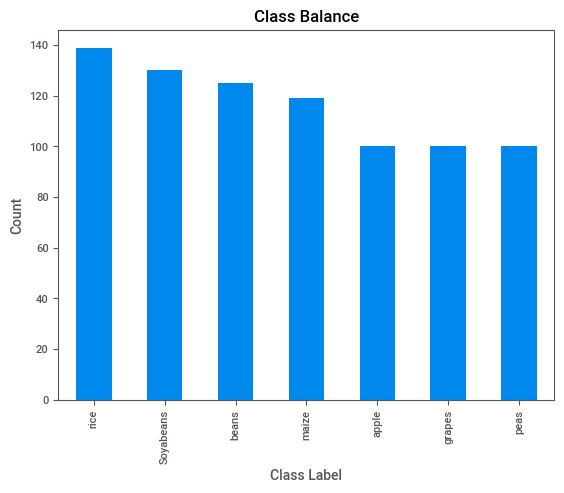

In [11]:
# Class Balance Check
class_counts = crop_df['label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Balance')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

In [12]:
# Extrating features adn assinging to X and Assigning labels tob y variables

X = crop_df.drop('label', axis=1)
y = crop_df['label']

In [13]:
# View X variable
print(X)

      N   P   K  temperature   humidity        ph    rainfall
0    90  42  43    20.879744  82.002744  6.502985  202.935536
1    85  58  41    21.770462  80.319644  7.038096  226.655537
2    60  55  44    23.004459  82.320763  7.840207  263.964248
3    74  35  40    26.491096  80.158363  6.980401  242.864034
4    78  42  42    20.130175  81.604873  7.628473  262.717340
..   ..  ..  ..          ...        ...       ...         ...
808   3  67  24    17.000676  19.907905  5.520880  103.292641
809  35  69  23    16.787915  24.968818  5.578410   75.453280
810   3  77  25    24.849062  22.894646  5.608165   62.212922
811  23  62  19    16.517835  20.455560  5.609435   98.777942
812  22  71  17    18.153002  19.386021  5.509295  107.690796

[813 rows x 7 columns]


In [14]:
# View y variable
print(y)

0       rice
1       rice
2       rice
3       rice
4       rice
       ...  
808    beans
809    beans
810    beans
811    beans
812    beans
Name: label, Length: 813, dtype: object


In [15]:
#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state= 100)

In [16]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier  

for name, tree in [('Decision Tree Classifier', DecisionTreeClassifier(random_state=100))]: 
    tree.fit(X_train,y_train)
    predict = tree.predict(X_test)

In [17]:
# Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
print('\nEstimator: {}'.format(name)) 
print(confusion_matrix(y_test,predict))  
print(classification_report(y_test,predict)) 


Estimator: Decision Tree Classifier
[[26  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0 25  0  0  0  0]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 24  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        26
       apple       1.00      1.00      1.00        20
       beans       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        24
        peas       1.00      1.00      1.00        20
        rice       1.00      1.00      1.00        28

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163

